In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from test import load_bw_image, load_color_image, create_color_image_from_output
import skimage.color

from model.resnet_unet import ResNetBasedUNet

device = torch.device('cuda')

In [2]:
model_path = '/mnt/Research/ShanghaiProject/code/checkpoint/lr0.0001_2020-05-18-21-21-43_frozen_resnet_encoder/epoch6_iter19999.pt'
model = torch.nn.DataParallel(ResNetBasedUNet().to(device))

checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [16]:
image1_path = '/mnt/Research/ShanghaiProject/test-dataset/test/1166.png'
image2_path = '/mnt/Research/ShanghaiProject/test-dataset/test/1137.png'
image3_path = '/mnt/Research/ShanghaiProject/test-dataset/train/186.png'
image4_path = '/mnt/Research/ShanghaiProject/bw-frames/705.png'
image5_path = '/mnt/Research/ShanghaiProject/bw-frames/138.png'

# original_image, L_channel = load_color_image(image2_path)
L_channel = load_bw_image(image5_path)
# print(f'Image shape: {original_image.shape}')
print(f'L channel shape: {L_channel.shape}')

L channel shape: (1, 1, 352, 480)


In [17]:
output = model(torch.tensor(L_channel).to(device))
print(f'Predictions shape: {output.shape}')

Predictions shape: torch.Size([1, 2, 352, 480])


Lab shape: (352, 480, 3)
Mean in L channel: 57.33960007176255
Mean in a channel: 6.1188338609242985
Mean in b channel: 13.476041382254863


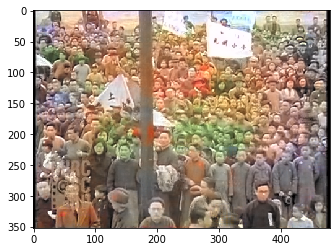

In [18]:
rgb_output = create_color_image_from_output(output, L_channel)
plt.imshow(rgb_output)
